# Implementing quantum channels in a quantum computer using smaller registers

Implementation of quantum channels using smaller ancillas (i.e. a smaller quantum register) by factorizing the target quantum channel in Kraus deficient channels

In [148]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit.gate import Gate

In [150]:
?Gate.control

## Constructing circuits for the implementation of total depolarizing channel

In [129]:
q = QuantumRegister(2)
c = ClassicalRegister(1)
qc=QuantumCircuit(q,c)

In [130]:
U=[[0,0,0,1],
   [0,1,0,0],
   [0,0,1,0],
   [1,0,0,0]
  ]
U2=[[1,0,0,0],
   [0,2**-0.5,2**-0.5,0],
   [0,2**-0.5,-2**-0.5,0],
    [0,0,0,1]
   ]
U3=[[0,0,1,0],
   [2**-0.5,0,0,2**-0.5],
   [-2**-0.5,0,0,2**-0.5],
    [0,1,0,0]
   ]

In [131]:
qc.unitary(U,[0,1])
qc.measure(0,0)
qc.unitary(U2,[0,1]).c_if(c, 0)
qc.unitary(U3,[0,1]).c_if(c, 1)

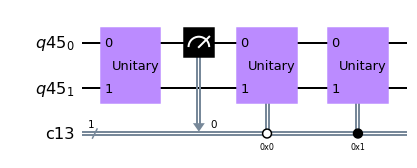

In [88]:
qc.draw("mpl")

_Transpiling_ the circuit

In [89]:
trans_qc=transpile(qc,basis_gates=['cx','u3','u','cz'],optimization_level=3)

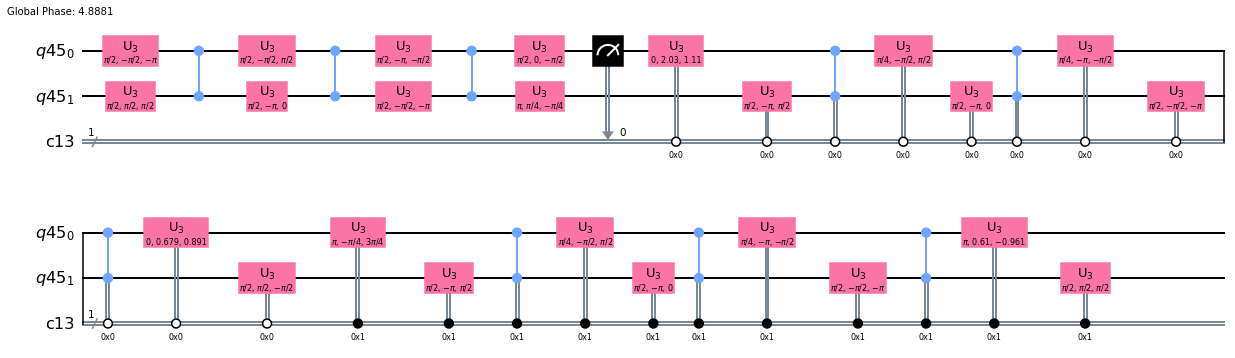

In [90]:
trans_qc.draw('mpl')

### Quantum process tomography

In [74]:
# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
from qiskit.tools.monitor import job_monitor

In [96]:
backend='ibmq_manila'
quamtum_computer= provider.get_backend(backend)

In [91]:
qpt_circs = process_tomography_circuits(trans_qc,q[1],prepared_qubits=q[1])

In [77]:
# Primero iniciamos sesión
from qiskit import IBMQ
# Cargando cuenta de IBM (para realizar esto es necesaria una cuenta de IBM)
provider = IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

ibmqfactory.load_account:WARNING:2022-05-15 17:38:02,546: Credentials are already in use. The existing account in the session will be replaced.


In [97]:
job = execute(qpt_circs,backend=quamtum_computer, shots=10000)

job_monitor(job)

Job Status: job incurred error     


In [93]:
qpt_tomo_comp = ProcessTomographyFitter(job.result(), qpt_circs)

IBMQJobFailureError: 'Unable to retrieve result for job 62811f3548360a1e37542be4. Job has failed: Instruction bfunc is not supported. Error code: 7001.'

In [ ]:
qpt_tomo_comp.fit()

In [73]:
job.experiment_id

# Using deferred measurement example 1

In [264]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit.gate import Gate
import numpy as np

In [208]:
U=[[0,0,0,1],
   [0,1,0,0],
   [0,0,1,0],
   [1,0,0,0]
  ]
U2=[[1,0,0,0],
   [0,2**-0.5,2**-0.5,0],
   [0,2**-0.5,-2**-0.5,0],
    [0,0,0,1]
   ]
U3=[[0,0,1,0],
   [2**-0.5,0,0,2**-0.5],
   [-2**-0.5,0,0,2**-0.5],
    [0,1,0,0]
   ]

In [209]:
qc1=QuantumCircuit(2)
qc1.unitary(U2,[0,1])
qc2=QuantumCircuit(2)
qc2.unitary(U3,[0,1])
qc2.draw()

┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘

In [237]:
q = QuantumRegister(3)
qc=QuantumCircuit(q)
qc.unitary(U,[0,1])
cU1=qc1.to_gate().control(1,ctrl_state=0)
qc.append(cU1,[0,2,1])
cU1=qc2.to_gate().control(1,ctrl_state=1)
qc.append(cU1,[0,2,1])
qc.draw()
#qc.unitary(U3,[0,1]).c_if(c, 1)

┌──────────┐                                  
q196_0: ┤0         ├────────o────────────────■────────
        │  Unitary │┌───────┴───────┐┌───────┴───────┐
q196_1: ┤1         ├┤1              ├┤1              ├
        └──────────┘│  circuit-1136 ││  circuit-1137 │
q196_2: ────────────┤0              ├┤0              ├
                    └───────────────┘└───────────────┘

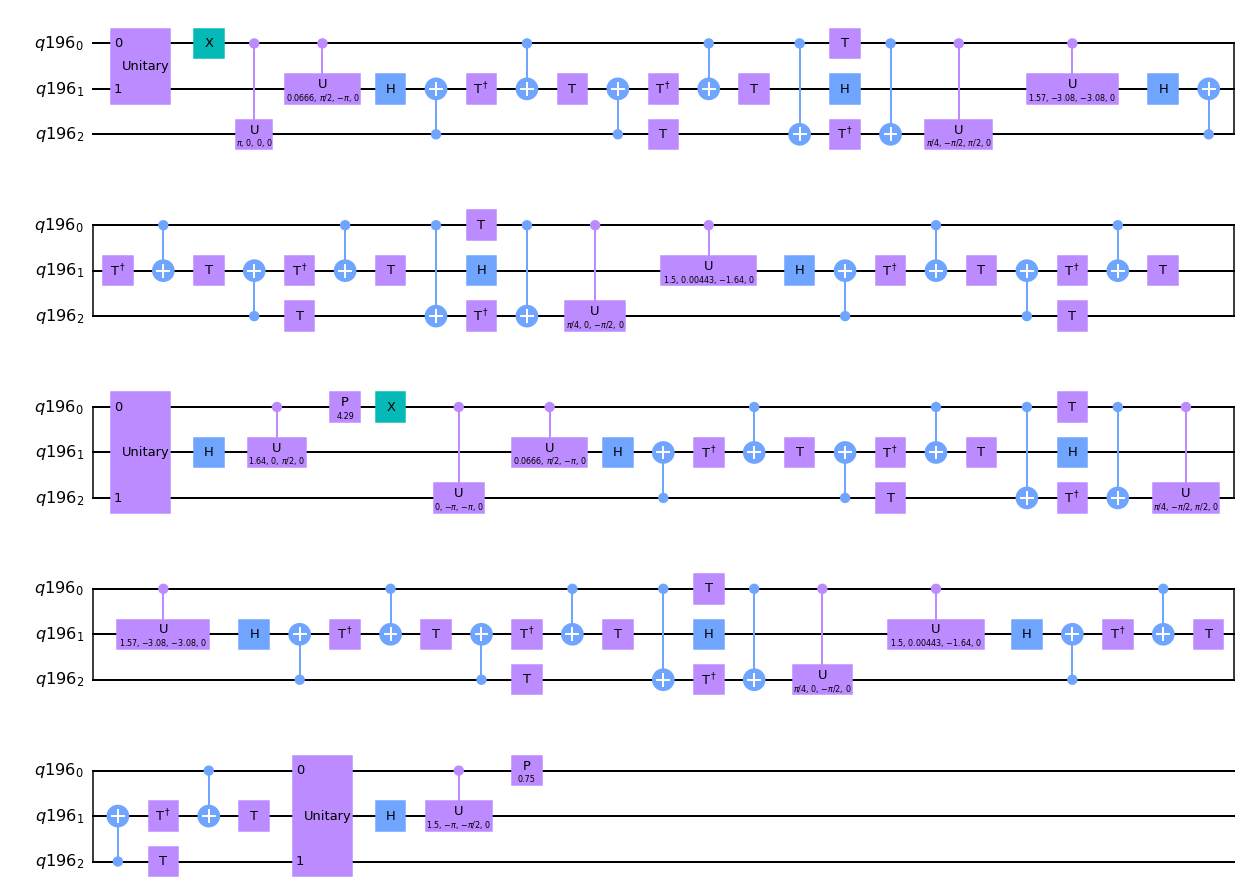

In [238]:
qc_transpiled=transpile(qc,optimization_level=3)
qc_transpiled.draw('mpl')

### Quantum process tomography

In [234]:
# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
from qiskit.tools.monitor import job_monitor

In [235]:
backend='ibmq_quito'
quamtum_computer= provider.get_backend(backend)

In [239]:
qpt_circs = process_tomography_circuits(qc,q[1],prepared_qubits=q[1])

In [254]:
type(qc)

qiskit.circuit.quantumcircuit.QuantumCircuit

In [257]:
qpt_circs[2].draw()

░ ┌──────────┐                                   ░    
q196_0: ─░─┤0         ├────────o────────────────■─────────░────
         ░ │  Unitary │┌───────┴───────┐┌───────┴───────┐ ░ ┌─┐
q196_1: ─░─┤1         ├┤1              ├┤1              ├─░─┤M├
         ░ └──────────┘│  circuit-1136 ││  circuit-1137 │ ░ └╥┘
q196_2: ─░─────────────┤0              ├┤0              ├─░──╫─
         ░             └───────────────┘└───────────────┘ ░  ║ 
 c19: 1/═════════════════════════════════════════════════════╩═
                                                             0

In [240]:
# Primero iniciamos sesión
from qiskit import IBMQ
# Cargando cuenta de IBM (para realizar esto es necesaria una cuenta de IBM)
provider = IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

ibmqfactory.load_account:WARNING:2022-05-15 23:49:25,535: Credentials are already in use. The existing account in the session will be replaced.


In [248]:
job = execute(qpt_circs,backend=quamtum_computer, shots=20000)

job_monitor(job)

Job Status: job has successfully run


In [249]:
qpt_tomo_comp = ProcessTomographyFitter(job.result(), qpt_circs)

In [258]:
choi=qpt_tomo_comp.fit()

In [263]:
print(np.round(choi,3))

[[ 0.586+0.j    -0.034+0.075j  0.024+0.078j  0.033+0.071j]
 [-0.034-0.075j  0.414+0.j    -0.039-0.009j -0.024-0.078j]
 [ 0.024-0.078j -0.039+0.009j  0.506+0.j     0.09 -0.008j]
 [ 0.033-0.071j -0.024+0.078j  0.09 +0.008j  0.494+0.j   ]]


# Using deferred measurement example 2

In [311]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit.gate import Gate

In [312]:
U=[[0,0,1,0],
   [0,1,0,0],
   [1,0,0,0],
   [0,0,0,1]
  ]
l=0.5
gm=(1-l)**0.5/(2**0.5)
gp=(1+l)**0.5/(2**0.5)
U2=[[0,gm,0,-gp],
   [gm,0,-gp,0],
   [gp,0,gm,0],
    [0,gp,0,gm]]
U3=[[0,-gp,0,gm],
   [-gp,0,gm,0],
   [gm,0,gp,0],
     [0,gm,0,gp]]

In [313]:
qc1=QuantumCircuit(2)
qc1.unitary(U2,[0,1])
qc2=QuantumCircuit(2)
qc2.unitary(U3,[0,1])
qc2.draw()

┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘

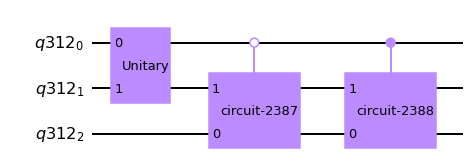

In [314]:
q = QuantumRegister(3)
qc=QuantumCircuit(q)
qc.unitary(U,[0,1])
cU1=qc1.to_gate().control(1,ctrl_state=0)
qc.append(cU1,[0,2,1])
cU1=qc2.to_gate().control(1,ctrl_state=1)
qc.append(cU1,[0,2,1])
qc.draw('mpl')
#qc.unitary(U3,[0,1]).c_if(c, 1)

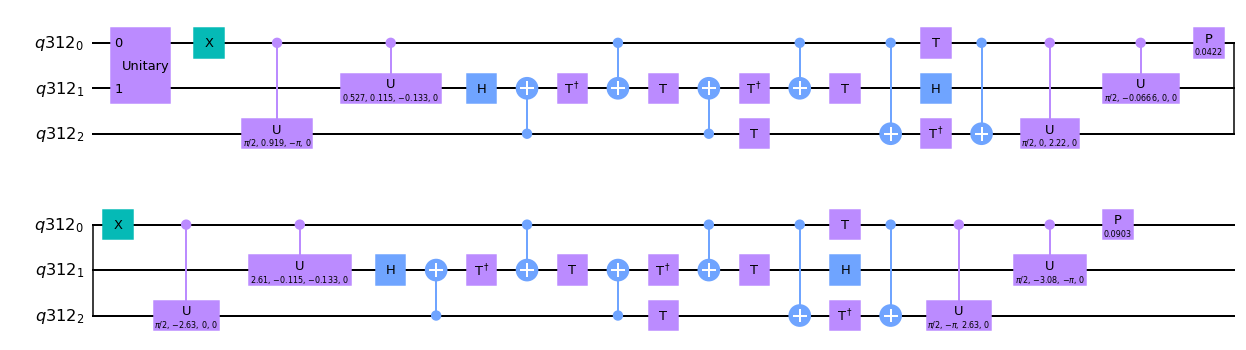

In [315]:
qc_transpiled=transpile(qc,optimization_level=3)
qc_transpiled.draw('mpl')

### Quantum process tomography

In [276]:
# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
from qiskit.tools.monitor import job_monitor

In [316]:
backend='ibmq_lima'
quamtum_computer= provider.get_backend(backend)

In [317]:
qpt_circs = process_tomography_circuits(qc,[1],prepared_qubits=[1])

In [240]:
# Primero iniciamos sesión
from qiskit import IBMQ
# Cargando cuenta de IBM (para realizar esto es necesaria una cuenta de IBM)
provider = IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

ibmqfactory.load_account:WARNING:2022-05-15 23:49:25,535: Credentials are already in use. The existing account in the session will be replaced.


In [319]:
job = execute(qpt_circs,backend=quamtum_computer, shots=20000)

job_monitor(job)

Job Status: job has successfully run


In [320]:
qpt_tomo_comp = ProcessTomographyFitter(job.result(), qpt_circs)

In [321]:
choi=qpt_tomo_comp.fit()

In [322]:
print(np.round(choi,3))

[[ 0.735+0.j     0.043-0.038j -0.297-0.072j  0.066+0.079j]
 [ 0.043+0.038j  0.265+0.j    -0.108-0.101j  0.297+0.072j]
 [-0.297+0.072j -0.108+0.101j  0.374+0.j     0.015-0.055j]
 [ 0.066-0.079j  0.297-0.072j  0.015+0.055j  0.626+0.j   ]]


# Testing ordering

In [233]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit.gate import Gate

In [291]:
U=[[0,0,0,1],
   [0,1,0,0],
   [0,0,1,0],
   [1,0,0,0]
  ]

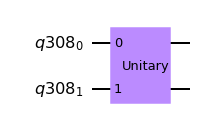

In [292]:
q = QuantumRegister(2)
qc=QuantumCircuit(q)
qc.unitary(U,[0,1])
qc.draw('mpl')

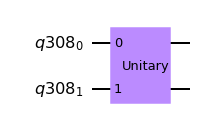

In [293]:
qc_transpiled=transpile(qc,optimization_level=3)
qc_transpiled.draw('mpl')

### Quantum process tomography

In [276]:
# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
from qiskit.tools.monitor import job_monitor

In [294]:
backend='ibmq_quito'
quamtum_computer= provider.get_backend(backend)

In [304]:
qpt_circs = process_tomography_circuits(qc,[0],prepared_qubits=[0])

In [240]:
# Primero iniciamos sesión
from qiskit import IBMQ
# Cargando cuenta de IBM (para realizar esto es necesaria una cuenta de IBM)
provider = IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

ibmqfactory.load_account:WARNING:2022-05-15 23:49:25,535: Credentials are already in use. The existing account in the session will be replaced.


In [305]:
job = execute(qpt_circs,backend=quamtum_computer, shots=20000)

job_monitor(job)

Job Status: job has successfully run


In [306]:
qpt_tomo_comp = ProcessTomographyFitter(job.result(), qpt_circs)

In [307]:
choi=qpt_tomo_comp.fit()

In [308]:
print(np.round(choi,3))

[[ 0.083+0.j     0.018+0.023j -0.002-0.004j  0.072-0.089j]
 [ 0.018-0.023j  0.917+0.j    -0.033+0.033j  0.002+0.004j]
 [-0.002+0.004j -0.033-0.033j  0.08 +0.j     0.003-0.05j ]
 [ 0.072+0.089j  0.002-0.004j  0.003+0.05j   0.92 +0.j   ]]


In [303]:
print(np.round(choi,3))

[[ 0.109+0.j     0.067-0.058j  0.004-0.004j  0.011-0.034j]
 [ 0.067+0.058j  0.891+0.j    -0.015-0.012j -0.004+0.004j]
 [ 0.004+0.004j -0.015+0.012j  0.115+0.j     0.029-0.09j ]
 [ 0.011+0.034j -0.004-0.004j  0.029+0.09j   0.885+0.j   ]]
